Table of content
* Data cleaning
* Data Engineering (derive features)
* Explore
* Train
* Predict
* Output

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_air_reserve = pd.read_csv('../input/air_reserve.csv', index_col=False, header=0)
df_air_store_info = pd.read_csv('../input/air_store_info.csv', index_col=False, header=0)
df_air_visit_data = pd.read_csv('../input/air_visit_data.csv', index_col=False, header=0)
df_date_info = pd.read_csv('../input/date_info.csv', index_col=False, header=0)
df_hpg_reserve = pd.read_csv('../input/hpg_reserve.csv', index_col=False, header=0)
df_hpg_store_info = pd.read_csv('../input/hpg_store_info.csv', index_col=False, header=0)
df_sample_submission = pd.read_csv('../input/sample_submission.csv', index_col=False, header=0)
df_store_id_relation = pd.read_csv('../input/store_id_relation.csv', index_col=False, header=0)

In [3]:
df_sample_submission.describe()

,visitors
count,32019.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [6]:
df_air_visit_data.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [9]:
df_air_visit_data[:10]

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
5,air_ba937bf13d40fb24,2016-01-19,9
6,air_ba937bf13d40fb24,2016-01-20,31
7,air_ba937bf13d40fb24,2016-01-21,21
8,air_ba937bf13d40fb24,2016-01-22,18
9,air_ba937bf13d40fb24,2016-01-23,26


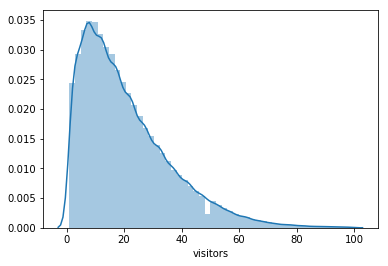

In [16]:
df = df_air_visit_data[df_air_visit_data['visitors']<100]
sns.distplot(df['visitors'])

In [19]:
df.visitors.value_counts()

8     8685
6     8684
10    8543
9     8532
7     8521
11    8107
12    8012
4     8004
5     7732
13    7673
14    7390
2     7230
16    7227
15    7208
17    6626
18    6504
3     6412
19    6112
20    6023
21    5644
22    5531
23    5277
24    4917
1     4811
25    4651
26    4626
27    4289
28    3990
29    3887
30    3757
      ... 
71     224
70     221
72     172
73     159
74     153
75     141
76     135
78     130
77     124
79     115
81      95
82      92
80      85
83      77
84      71
86      66
90      56
89      56
88      54
93      53
87      52
85      52
91      43
94      41
92      41
95      34
96      33
98      29
97      28
99      27
Name: visitors, Length: 99, dtype: int64

In [20]:
df_sample_submission['visitors']=8

In [21]:
df_sample_submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,8
1,air_00a91d42b08b08d9_2017-04-24,8
2,air_00a91d42b08b08d9_2017-04-25,8
3,air_00a91d42b08b08d9_2017-04-26,8
4,air_00a91d42b08b08d9_2017-04-27,8
5,air_00a91d42b08b08d9_2017-04-28,8
6,air_00a91d42b08b08d9_2017-04-29,8
7,air_00a91d42b08b08d9_2017-04-30,8
8,air_00a91d42b08b08d9_2017-05-01,8
9,air_00a91d42b08b08d9_2017-05-02,8


### Output

In [24]:
df_sample_submission.to_csv('../out/df_sample_submission.csv',columns=['id','visitors'], index=False)